# Car Brand Classification using Transfer Learning
The goal of this project is to classify cars based on brands using deep learning techniques.

In [1]:
import tensorflow

In [2]:
# Lets check the tensorflow version
tensorflow.__version__

'2.5.0'

In [3]:
# Importing the necessary libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Resizing all the images
IMAGE_SIZE = [224,224]

In [5]:
# Lets set the train and validation path
train_path = "Datasets/Train"
valid_path = "Datasets/Test"

In [6]:
# Importing the resnet50 library and adding preprocessing layer to the front
## We will be using imagenet weights

resnet = ResNet50(input_shape= IMAGE_SIZE + [3], weights= "imagenet", include_top= False)

In [7]:
# We will not train the existing weights
for layer in resnet.layers:
  layer.trainable = False

In [8]:
# Lets get the number of output classes
folders = glob("Datasets/Train/*")

In [9]:
#  Initializing the Flattening of the final/output layer
x = Flatten()(resnet.output)

In [10]:
# Lets create our output layer
prediction = Dense(len(folders), activation = "softmax")(x)

In [11]:
# Model Creation
model = Model(inputs = resnet.input, outputs = prediction)

In [12]:
# Lets see the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

conv5_block3_1_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_1_relu (Activation (None, 7, 7, 512)    0           conv5_block3_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block3_2_conv (Conv2D)    (None, 7, 7, 512)    2359808     conv5_block3_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block3_2_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block3_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_2_relu (Activation (None, 7, 7, 512)    0           conv5_block3_2_bn[0][0]          
__________________________________________________________________________________________________
conv5_bloc

In [13]:
# Setting the model's cost function, optimizer and metrics
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [14]:
# Importing the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Making sure that the same target size is provided as initiated for the image size
training_set = train_datagen.flow_from_directory("Datasets/Train",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 64 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory("Datasets/Test",
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 58 images belonging to 3 classes.


In [17]:
# Model Training
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\SWARNAVA\anaconda3\envs\fashion\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 91s 54s/step - loss: 4.8114 - accuracy: 0.3594 - val_loss: 11.3005 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 66s 48s/step - loss: 7.5718 - accuracy: 0.3750 - val_loss: 1.6529 - val_accuracy: 0.3448
Epoch 3/50
2/2 [==============================] - 86s 62s/step - loss: 3.5430 - accuracy: 0.3906 - val_loss: 2.7849 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 120s 84s/step - loss: 2.2991 - accuracy: 0.4531 - val_loss: 2.1841 - val_accuracy: 0.4828
Epoch 5/50
2/2 [==============================] - 103s 77s/step - loss: 2.7962 - accuracy: 0.4688 - val_loss: 3.1251 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 120s 93s/step - loss: 1.8739 - accuracy: 0.5469 - val_loss: 1.5579 - val_accuracy: 0.4655
Epoch 7/50
2/2 [==============================] - 126s 87s/step - loss: 1.8531 - accuracy: 0.4531 - val_loss: 1.8806 - val_accuracy: 0.3966
Epoch 8/50
2/2 [======

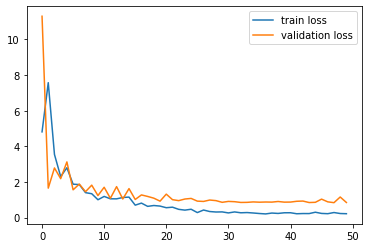

<Figure size 432x288 with 0 Axes>

In [18]:
# Lets plot the loss
plt.plot(r.history["loss"], label = "train loss")
plt.plot(r.history["val_loss"], label = "validation loss")
plt.legend()
plt.show();
plt.savefig("train_vs_valloss")

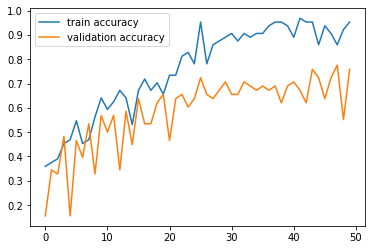

<Figure size 432x288 with 0 Axes>

In [19]:
# Lets plot the accuracy
plt.plot(r.history["accuracy"], label = "train accuracy")
plt.plot(r.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show();
plt.savefig("train_vs_valaccu")

In [20]:
# Saving the model to reuse again
model.save("model_resnet50.h5")

C:\Users\SWARNAVA\anaconda3\envs\fashion\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [21]:
# Prediction
y_pred = model.predict(test_set)

In [22]:
# Lets see the prediction
y_pred

array([[7.1758680e-02, 4.9678754e-02, 8.7856251e-01],
       [4.4312837e-04, 9.8616064e-01, 1.3396309e-02],
       [3.3167865e-02, 8.6281049e-01, 1.0402158e-01],
       [1.1848917e-05, 2.8326672e-03, 9.9715543e-01],
       [1.6603723e-01, 4.7186923e-01, 3.6209363e-01],
       [9.2538306e-03, 9.6384600e-02, 8.9436156e-01],
       [7.7162959e-02, 3.0578703e-01, 6.1704999e-01],
       [2.4385909e-02, 6.7417628e-01, 3.0143782e-01],
       [5.9644125e-02, 9.3882019e-03, 9.3096769e-01],
       [1.5835686e-02, 9.1889548e-01, 6.5268874e-02],
       [1.2220401e-01, 8.0106562e-01, 7.6730356e-02],
       [3.0056103e-03, 9.9075621e-01, 6.2381416e-03],
       [1.1786456e-01, 7.7288067e-01, 1.0925475e-01],
       [2.3646152e-02, 4.0939155e-01, 5.6696224e-01],
       [1.0996972e-02, 5.6939411e-01, 4.1960889e-01],
       [9.0606982e-01, 7.1823612e-02, 2.2106569e-02],
       [3.2546122e-03, 9.8005235e-01, 1.6693046e-02],
       [6.2480480e-03, 9.7175807e-01, 2.1993851e-02],
       [8.2656705e-05, 1.325

In [23]:
# Lets see the predicted class
y_pred = np.argmax(y_pred, axis = 1)

In [24]:
# Lets see the predicted clss
y_pred

array([2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2], dtype=int64)

In [25]:
# Loading the saved model

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model("model_resnet50.h5")

In [26]:
# Testing
img = image.load_img("Datasets/Test/mercedes/30.jpg", target_size = (224,224))

In [27]:
# Lets convert the image to array as it is a prerequisite into our model
x = image.img_to_array(img)
x 

array([[[ 15.,  15.,  15.],
        [ 15.,  15.,  15.],
        [ 15.,  15.,  15.],
        ...,
        [ 15.,  15.,  15.],
        [ 15.,  15.,  15.],
        [ 15.,  15.,  15.]],

       [[ 16.,  16.,  16.],
        [ 16.,  16.,  16.],
        [ 16.,  16.,  16.],
        ...,
        [ 16.,  16.,  16.],
        [ 16.,  16.,  16.],
        [ 16.,  16.,  16.]],

       [[ 16.,  16.,  16.],
        [ 16.,  16.,  16.],
        [ 16.,  16.,  16.],
        ...,
        [ 16.,  16.,  16.],
        [ 16.,  16.,  16.],
        [ 16.,  16.,  16.]],

       ...,

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 2

In [28]:
# Lets see the shape of the array above to verify
x.shape

(224, 224, 3)

In [29]:
# Lets rescale the array
x = x/255

In [30]:
# Lets expand the dimensions
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[0.00115501, 0.00140211, 0.99744284]], dtype=float32)

In [32]:
a = np.argmax(model.predict(img_data), axis = 1)
a

array([2], dtype=int64)

Hence, we can see that our model correctly predicted the car brand that is Mercedes here.